In [1]:
# HPC
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

# For surfvel data in tif files
import rasterio
from rasterio.transform import from_origin

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
xModel10 = np.arange(-72.,97.,1.0)*10
yModel10 = np.arange(-345.,-56.,1.0)*10
xModel16 = np.arange(-72.,97.,1.6)*10
yModel16 = np.arange(-345.,-56.,1.6)*10
xModel40 = np.arange(-72.,97.,4.0)*10
yModel40 = np.arange(-345.,-56.,4.0)*10

dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')

!rm /scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc
ds_age_correct = ageData.correctAgeDataset(ds_age,
                            path = dataPath,
                            filename = 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc',
                            zetaLevels = 26,
                            unCorrupt = True)
ds_age_correct = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')
ds_bm5 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/BedMachineGreenland-v5.nc")
ds_bm5_orig = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms_orig.nc")
ds_age_old = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms_old.nc")

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['grid_mapping'] = 'mapping'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['standard_name'] = 'land_ice_thickness_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['long_name'] = 'Ice thickness uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs']*0.0 + 5.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['standard_name'] = 'land_ice_surface_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['long_name'] = 'Ice surface uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].copy()
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['standard_name'] = 'land_ice_bed_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['long_name'] = 'Ice bed uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_age_data_40kms.nc', mode='w')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_bm5_data_40kms.nc', mode='w')

Uncorrupt z=1.
Uncorrupt z=2.
Uncorrupt z=3.


In [3]:
def frac_area(x, y, xx, yy):
    """
    Compute the fraction of the area of the small rectangle (xx, yy)
    within the large rectangle (x, y).

    Parameters:
        x, y:   Length-2 arrays for the large rectangle [x1, x2], [y1, y2]
        xx, yy: Length-2 arrays for the small rectangle

    Returns:
        Fraction of area of (xx, yy) within (x, y)
    """

    x = sorted(x)
    y = sorted(y)
    xx = sorted(xx)
    yy = sorted(yy)

    dx_inv = 1.0 / (x[1] - x[0])
    dy_inv = 1.0 / (y[1] - y[0])

    # Normalize coordinates of small rectangle to large rectangle frame
    xxm = (np.array(xx) - x[0]) * dx_inv
    yym = (np.array(yy) - y[0]) * dy_inv

    # Error check: small rectangle should not be larger than the big one
    if (xx[1] - xx[0] > x[1] - x[0]) or (yy[1] - yy[0] > y[1] - y[0]):
        raise ValueError("Small rectangle larger than large rectangle!")

    # Fully inside
    if 0 <= xxm[0] and xxm[1] <= 1 and 0 <= yym[0] and yym[1] <= 1:
        return 1.0

    # Edge overlap cases
    if 0 <= xxm[0] and xxm[1] <= 1:
        if yym[0] < 0 < yym[1]:
            return yym[1] / (yym[1] - yym[0])
        elif yym[0] < 1 < yym[1]:
            return (1 - yym[0]) / (yym[1] - yym[0])
        else:
            return 0.0

    if 0 <= yym[0] and yym[1] <= 1:
        if xxm[0] < 0 < xxm[1]:
            return xxm[1] / (xxm[1] - xxm[0])
        elif xxm[0] < 1 < xxm[1]:
            return (1 - xxm[0]) / (xxm[1] - xxm[0])
        else:
            return 0.0

    # Corner overlap cases
    denom = (xxm[1] - xxm[0]) * (yym[1] - yym[0])
    if denom == 0:
        return 0.0

    if xxm[0] < 0 < xxm[1] and yym[0] < 0 < yym[1]:
        return xxm[1] * yym[1] / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 0 < yym[1]:
        return (1 - xxm[0]) * yym[1] / denom
    if xxm[0] < 0 < xxm[1] and yym[0] < 1 < yym[1]:
        return xxm[1] * (1 - yym[0]) / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 1 < yym[1]:
        return (1 - xxm[0]) * (1 - yym[0]) / denom

    return 0.0

# -----------------------------
# Area-weighted downsampling (H + mask)
def area_weighted_downsample_with_mask_H(H_hr, mask_hr, x_hr, y_hr, x_lr, y_lr, dx_lr, dx_hr):
    """
    Downsample high-resolution H field and masks from age data grid to a 
    coarser SICOPOLIS (sico) grid using area-weighted interpolation.

    Parameters:
        H_hr: H data from age data nc file (high resolution)
        mask_hr: dict of 2D arrays (y, x), masks (e.g., ice, ocean) at bm resolution
        x_hr, y_hr: 1D arrays of age data grid coordinates
        x_lr, y_lr: 1D arrays of coarse sico grid coordinates
        dx_lr: spacing of sico grid (same for x and y)
        dx_hr: horizontal resolution of age data grid (same for x and y)
    Returns:
        H_lr: downsampled H field
        r_masks: downsampled masks
    """

    shape = (len(y_lr), len(x_lr))
    H_lr = np.zeros(shape)
    r_masks = {k: np.zeros(shape) for k in range(5)}  # 0–4: grounded, land, ocean, floating, nongrlld

    for j, y in enumerate(y_lr):
        for i, x in enumerate(x_lr):

            # Handle points outside age data domain as ocean
            if x < x_hr[0] or x > x_hr[-1] or y < y_hr[0] or y > y_hr[-1]:
                continue

            # Define bounding box around current coarse cell
            x1, x2 = x - 0.5*(dx_lr + dx_hr), x + 0.5*(dx_lr + dx_hr)
            y1, y2 = y - 0.5*(dx_lr + dx_hr), y + 0.5*(dx_lr + dx_hr)

            # Convert bounding box to index range in BedMachine grid
            ii1 = int(np.floor((x1 - x_hr[0]) / dx_hr))
            ii2 = int(np.ceil((x2 - x_hr[0]) / dx_hr))
            jj1 = int(np.floor((y1 - y_hr[0]) / dx_hr))
            jj2 = int(np.ceil((y2 - y_hr[0]) / dx_hr))

            H_sum = 0.0
            w_sum = 0.0
            mask_sum = np.zeros(5)

            # Loop over overlapping fine grid cells
            for jj in range(jj1, jj2):
                for ii in range(ii1, ii2):
                    if 0 <= ii < len(x_hr) and 0 <= jj < len(y_hr):
                        w = frac_area(
                            [x - 0.5*dx_lr, x + 0.5*dx_lr],
                            [y - 0.5*dx_lr, y + 0.5*dx_lr],
                            [x_hr[ii] - 0.5*dx_hr, x_hr[ii] + 0.5*dx_hr],
                            [y_hr[jj] - 0.5*dx_hr, y_hr[jj] + 0.5*dx_hr]
                        )
                        H_sum += w * H_hr[jj, ii]
                        mval = mask_hr[jj, ii]
                        if 0 <= mval <= 4:
                            mask_sum[mval] += w
                        w_sum += w

            # Normalize sums by total weight to get downsampled values
            if w_sum > 0:
                H_lr[j, i] = H_sum / w_sum
                for k in range(5):
                    r_masks[k][j, i] = mask_sum[k] / w_sum

    return H_lr, r_masks

# -----------------------------
# Downsample 3D fields with a given mask
def downsample_3d_field_with_mask(field_hr, x_hr, y_hr, x_lr, y_lr, dx_lr, mask_sico, coverage_thresh=0.5):
    """
    Downsample high-resolution 3D fields and masks from age data grid to a 
    coarser SICOPOLIS (sico) grid using area-weighted interpolation.

    Parameters:
        field_hr: high resolution 3D field from age_data
        x_hr, y_hr: 1D arrays of age data grid coordinates
        x_lr, y_lr: 1D arrays of coarse sico grid coordinates
        dx_lr: spacing of sico grid (same for x and y)
        mask_sico: mask of coarse sico grid
        coverage_thresh:
    Returns:
        field_lr: downsampled 3D field (in 2D sense it's downsampled)
    """

    nz = field_hr.shape[0]
    field_lr = np.full((nz, len(y_lr), len(x_lr)), np.nan)
    dx_hr = x_hr[1] - x_hr[0]

    for j, y in enumerate(y_lr):
        for i, x in enumerate(x_lr):
            # if not ((mask_sico[j, i] == 0) or (mask_sico[j, i] == 3)):
            #     continue  # valid only over grounded or floating ice

            # Define bounding box around current coarse cell
            x1, x2 = x - 0.5 * dx_lr, x + 0.5 * dx_lr
            y1, y2 = y - 0.5 * dx_lr, y + 0.5 * dx_lr

            # Convert bounding box to index range in BedMachine grid
            ii1 = int(np.floor((x1 - x_hr[0]) / dx_hr))
            ii2 = int(np.ceil((x2 - x_hr[0]) / dx_hr))
            jj1 = int(np.floor((y1 - y_hr[0]) / dx_hr))
            jj2 = int(np.ceil((y2 - y_hr[0]) / dx_hr))

            # Loop over overlapping fine grid cells
            for k in range(nz):
                # Count_valid only increments if it's not NaN
                v_sum, count_valid, total = 0.0, 0, 0
                for jj in range(jj1, jj2):
                    for ii in range(ii1, ii2):
                        if 0 <= ii < len(x_hr) and 0 <= jj < len(y_hr):
                            val = field_hr[k, jj, ii]
                            if np.isfinite(val):
                                v_sum += val
                                count_valid += 1
                            total += 1
                if total > 0 and (count_valid / total) >= coverage_thresh:
                    field_lr[k, j, i] = v_sum / count_valid

    return field_lr

In [4]:
# Flip BedMachine y-axis
y_bm = ds_bm5["y"].values[::-1] / 1000.0
x_bm = ds_bm5["x"].values / 1000.0
mask_bm = np.flip(ds_bm5["mask"].values, axis=0).astype(np.int16)

# Extract age grid
x_age = ds_age_correct["xMesh"].values[0]
y_age = ds_age_correct["yMesh"].values[:, 0]
dx_age = x_age[1] - x_age[0]
dx_bm = x_bm[1] - x_bm[0]

# Define non-Greenland mask regions and blank them out
regions = [
    (np.array([x_bm[0], -1190.0]), np.array([110.0, y_bm[-1]])),    # Ellesmere
    (np.array([400.0, y_bm[-1]]), np.array([x_bm[-1], -900.0])),    # Svalbard
    (np.array([x_bm[-1], -2250.0]), np.array([250.0, y_bm[0]])),    # Iceland
    (np.array([-300.0, y_bm[0]]), np.array([x_bm[0], -2000.0]))     # Baffin
]
for p1, p2 in regions:
    v = p2 - p1
    for j in range(len(y_bm)):
        for i in range(len(x_bm)):
            test = np.array([x_bm[i], y_bm[j]]) - p1
            if v[0]*test[1] - v[1]*test[0] > 0:
                mask_bm[j, i] = 4 # Mark as non-Greenland

# Interpolate via area-weighted majority vote from bm5 grid (fine) to age data grid (coarser but still finer than sico grid)
mask_down = np.zeros((len(y_age), len(x_age)), dtype=np.int16)
for j, y in enumerate(y_age):
    for i, x in enumerate(x_age):

        # Handle points outside BedMachine domain as ocean
        if x < x_bm[0] or x > x_bm[-1] or y < y_bm[0] or y > y_bm[-1]:
            mask_down[j, i] = 2
            continue

        # Define bounding box around current coarse cell
        x1, x2 = x - 0.5*(dx_age+dx_bm), x + 0.5*(dx_age+dx_bm)
        y1, y2 = y - 0.5*(dx_age+dx_bm), y + 0.5*(dx_age+dx_bm)

        # Convert bounding box to index range in BedMachine grid
        ii1 = int(np.floor((x1 - x_bm[0]) / dx_bm))
        ii2 = int(np.ceil((x2 - x_bm[0]) / dx_bm))
        jj1 = int(np.floor((y1 - y_bm[0]) / dx_bm))
        jj2 = int(np.ceil((y2 - y_bm[0]) / dx_bm))

        counts = np.zeros(5)  # 0: grounded, 1: land, 2: ocean, 3: floating, 4: non-Greenland
        for jj in range(jj1, jj2):
            for ii in range(ii1, ii2):
                if 0 <= ii < len(x_bm) and 0 <= jj < len(y_bm):
                    mval = mask_bm[jj, ii]
                    if 0 <= mval <= 4:
                        counts[mval] += 1

        if counts.sum() > 0:
            mask_down[j, i] = int(np.argmax(counts))
        else:
            mask_down[j, i] = 2  # Default to ocean if empty

# Load high-res data
age_hr = ds_age_correct["age_c"].values  # shape: (nz, ny_hr, nx_hr)
age_uncert_hr = ds_age_correct["age_c_uncert"].values
H_hr = ds_age_correct["H"].values      # shape: (ny_hr, nx_hr)

# Define low-res target grid (e.g., from SICOPOLIS)
x_sico = np.arange(-720, 960 + 40, 40)  # in km
y_sico = np.arange(-3450, -570 + 40, 40)
dx_sico = 40.0  # km

# Downsample H using area-weighted average + mask
H_lr, r_masks = area_weighted_downsample_with_mask_H(H_hr, mask_down, x_age, y_age, x_sico, y_sico, dx_sico, dx_age)

# Construct final majority-vote mask (same method as before)
stack = np.stack([r_masks[k] for k in range(5)])  # order: 0–4
mask_sico = np.take([0, 3, 1, 2, 2], np.argmax(stack, axis=0))  # SICOPOLIS order: 0 grounded, 1 land, 2 ocean, 3 floating

# Downsample age and age_uncert using the same mask (only where grounded or floating)
age_lr = downsample_3d_field_with_mask(
    age_hr, x_age, y_age, x_sico, y_sico, dx_sico, mask_sico, coverage_thresh=0.5
)

age_uncert_lr = downsample_3d_field_with_mask(
    age_uncert_hr, x_age, y_age, x_sico, y_sico, dx_sico, mask_sico, coverage_thresh=0.5
)

print("Downsampling complete.")

for j in range(len(y_sico)):
    for i in range(len(x_sico)):
        age_lr[:, j, i] = ageData.interpolate_nans(age_lr[:, j, i], bool_uncert = False)

age_uncert_lr_1 = np.copy(age_uncert_lr)
for j in range(len(y_sico)):
    for i in range(len(x_sico)):
        # Update age_uncert_lr_1 first before age_uncert_lr gets updated
        age_uncert_lr_1[:, j, i] = ageData.interpolate_nans(age_uncert_lr[:, j, i], bool_uncert = True)
        age_uncert_lr[:, j, i] = ageData.interpolate_nans(age_uncert_lr[:, j, i], bool_uncert = False)

print("NaNs removal complete.")

Downsampling complete.
NaNs removal complete.


In [5]:
zeta_data = np.arange(0,1+1./25,1./25)
zeta = np.arange(0,1+1./80,1./80)
sigma = dataCleaner.exp_sigma_level(zeta = np.arange(0,1+1./80,1./80),
                                    exponent = 2.0)

da_age_c = xr.DataArray(
        data = age_lr,
        dims = ["sigma", "y", "x"],
        coords = dict(
            sigma = zeta_data,
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="age_c in a"),
    )

da_age_c_uncert_unbounded = xr.DataArray(
        data = age_uncert_lr,
        dims = ["sigma", "y", "x"],
        coords = dict(
            sigma = zeta_data,
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="age_c_uncert in a"),
    )

da_age_c_uncert_unbounded_rigorous = xr.DataArray(
        data = age_uncert_lr_1,
        dims = ["sigma", "y", "x"],
        coords = dict(
            sigma = zeta_data,
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="age_c_uncert (rigorous calculation i.e. variances are additive) in a"),
    )

da_H = xr.DataArray(
        data = H_lr,
        dims = ["y", "x"],
        coords = dict(
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="Thickness in m"),
    )

ds_age_40kms = xr.Dataset(
    data_vars=dict(
        age_c=da_age_c,
        age_c_uncert_unbounded=da_age_c_uncert_unbounded,
        age_c_uncert_unbounded_rigorous=da_age_c_uncert_unbounded_rigorous,
        H=da_H
    ),
    attrs=dict(
        title="Downsampled age, uncertainty, and thickness",
        description="Processed from corrected age data on to SICOPOLIS 40 km grid",
        units="age in years, thickness in meters"
    )
)

ds_age_40kms = ds_age_40kms.interp(sigma=sigma, method = "linear")
ds_age_40kms["age_c"].data[-1, :, :] = 0.0
ds_age_40kms["age_c"].data[np.isnan(ds_age_40kms["age_c"].data)] = -999.0
ds_age_40kms["age_c_uncert_unbounded"].data[np.isnan(ds_age_40kms["age_c_uncert_unbounded"].data)] = -2.e9
ds_age_40kms["age_c_uncert_unbounded_rigorous"].data[np.isnan(ds_age_40kms["age_c_uncert_unbounded_rigorous"].data)] = -2.e9

ratio = np.abs(ds_age_40kms["age_c"].data/ds_age_40kms["age_c_uncert_unbounded"].data)
ds_age_40kms["age_c_uncert"] = ds_age_40kms["age_c_uncert_unbounded"].copy()
ds_age_40kms["age_c_uncert"].data[ratio > 10] = 0.1*ds_age_40kms["age_c"].data[ratio > 10]

ratio = np.abs(ds_age_40kms["age_c"].data/ds_age_40kms["age_c_uncert_unbounded_rigorous"].data)
ds_age_40kms["age_c_uncert_rigorous"] = ds_age_40kms["age_c_uncert_unbounded_rigorous"].copy()
ds_age_40kms["age_c_uncert_rigorous"].data[ratio > 10] = 0.1*ds_age_40kms["age_c"].data[ratio > 10]

H_orig = ds_bm5_orig["H"].data
H_orig_safe = np.where(H_orig == 0, np.nan, H_orig)  # Avoid division by zero

scale_uncert_factor = 1 + np.abs((H_lr / H_orig_safe) - 1)*4.0    # Scale uncert to account for mismatch in H values between age data and BM5
scale_uncert_factor = np.nan_to_num(scale_uncert_factor, nan=2.5)  # Assign 2.5 when original H is zero
scale_uncert_factor = np.minimum(scale_uncert_factor, 5.0)         # Cap to max scale factor

ds_age_40kms["age_c_uncert"].data = ds_age_40kms["age_c_uncert"].data*scale_uncert_factor[None, :, :]
ds_age_40kms["age_c_uncert_rigorous"].data = ds_age_40kms["age_c_uncert_rigorous"].data*scale_uncert_factor[None, :, :]

ds_age_40kms["age_c_uncert"].data[ds_age_40kms["age_c_uncert"].data < 0] = -2.e9
ds_age_40kms["age_c_uncert_rigorous"].data[ds_age_40kms["age_c_uncert_rigorous"].data < 0] = -2.e9

!rm /scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc
ds_age_40kms.to_netcdf("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")

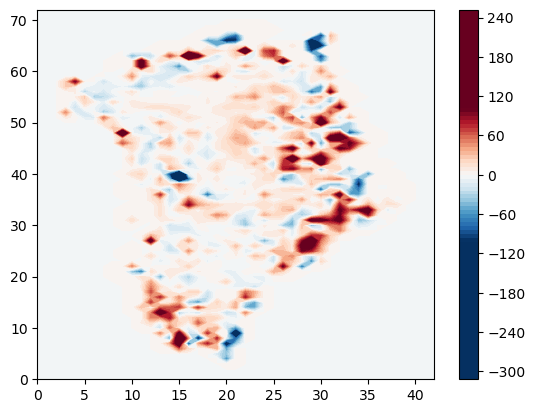

In [6]:
plt.contourf(H_lr-ds_bm5_orig["H"].data, cmap = "RdBu_r", vmin = -100, vmax = 100, levels = 100)
plt.colorbar()

/tmp/ipykernel_3943295/246116528.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.contourf((H_lr/ds_bm5_orig["H"].data-1)*(ds_bm5_orig["H"].data > 1500), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
/tmp/ipykernel_3943295/246116528.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((H_lr/ds_bm5_orig["H"].data-1)*(ds_bm5_orig["H"].data > 1500), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
/tmp/ipykernel_3943295/246116528.py:1: RuntimeWarning: invalid value encountered in multiply
  plt.contourf((H_lr/ds_bm5_orig["H"].data-1)*(ds_bm5_orig["H"].data > 1500), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


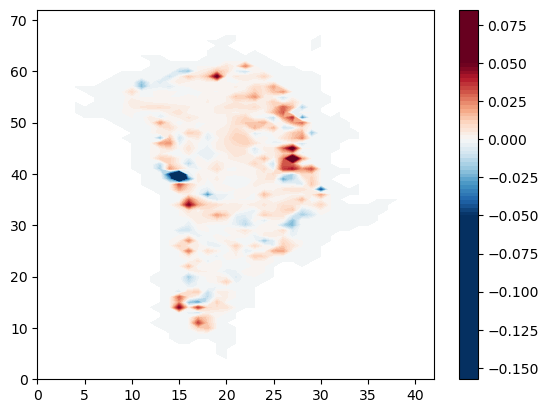

In [7]:
plt.contourf((H_lr/ds_bm5_orig["H"].data-1)*(ds_bm5_orig["H"].data > 1500), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3943295/3181783737.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.contourf((np.abs((H_lr/ds_bm5_orig["H"].data-1))>= 0.1)*(ds_bm5_orig["H"].data > 1500), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
/tmp/ipykernel_3943295/3181783737.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/ds_bm5_orig["H"].data-1))>= 0.1)*(ds_bm5_orig["H"].data > 1500), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


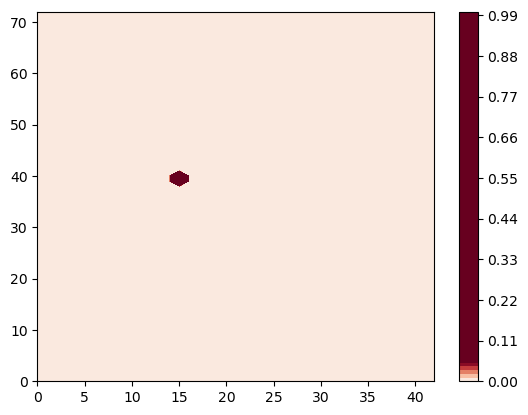

In [8]:
plt.contourf((np.abs((H_lr/ds_bm5_orig["H"].data-1))>= 0.1)*(ds_bm5_orig["H"].data > 1500), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

In [9]:
mask = (ds_age_40kms["age_c_uncert"].data < 0) & (ds_age_40kms["age_c"].data > 0)
np.sum(mask)

5163

In [10]:
mask = (ds_age_40kms["age_c_uncert"].data > 0) & (ds_age_40kms["age_c"].data < 0)
np.sum(mask)

0

In [11]:
mask = (ds_age_40kms["age_c_uncert"].data < 0) & (ds_age_40kms["age_c"].data < 0)
np.sum(mask)

203660

In [12]:
mask = (ds_age_40kms["age_c_uncert"].data > 0) & (ds_age_40kms["age_c"].data > 0)
np.sum(mask), np.nanmax(ds_age_40kms["age_c"].data / ds_age_40kms["age_c_uncert"].data * mask), np.nanmin(ds_age_40kms["age_c"].data / ds_age_40kms["age_c_uncert"].data * mask)

(42297, 9.999924813165915, -0.0)

In [13]:
mask = ds_age_40kms["age_c_uncert"].data == 0.0
np.sum(mask)

0

In [14]:
np.max(scale_uncert_factor*(H_orig > 500)), np.max(scale_uncert_factor*(H_orig > 1000)), np.max(scale_uncert_factor*(H_orig > 1500)), np.max(scale_uncert_factor*(H_orig > 2000))

(2.131788538387892, 1.621012679077892, 1.621012679077892, 1.621012679077892)

In [15]:
# points with more than 5% rel H error or 1.2 or more scaling
np.sum((scale_uncert_factor>1.2)*(H_orig > 500)), np.sum((scale_uncert_factor>1.2)*(H_orig > 1000)), np.sum((scale_uncert_factor>1.2)*(H_orig > 1500)), np.sum((scale_uncert_factor>1.2)*(H_orig > 2000))

(58, 17, 7, 2)

In [16]:
# points with more than 10% rel H error or 1.4 or more scaling
np.sum((scale_uncert_factor>1.4)*(H_orig > 500)), np.sum((scale_uncert_factor>1.4)*(H_orig > 1000)), np.sum((scale_uncert_factor>1.4)*(H_orig > 1500)), np.sum((scale_uncert_factor>1.4)*(H_orig > 2000))

(25, 2, 2, 1)

In [17]:
# points with more than 15% rel H error or 1.6 or more scaling
np.sum((scale_uncert_factor>1.6)*(H_orig > 500)), np.sum((scale_uncert_factor>1.6)*(H_orig > 1000)), np.sum((scale_uncert_factor>1.6)*(H_orig > 1500)), np.sum((scale_uncert_factor>1.6)*(H_orig > 2000))

(16, 2, 2, 1)

In [18]:
# points with more than 20% rel H error or 1.8 or more scaling
np.sum((scale_uncert_factor>1.8)*(H_orig > 500)), np.sum((scale_uncert_factor>1.8)*(H_orig > 1000)), np.sum((scale_uncert_factor>1.8)*(H_orig > 1500)), np.sum((scale_uncert_factor>1.8)*(H_orig > 2000))

(6, 0, 0, 0)

In [19]:
# points with more than 25% rel H error or 2.0 or more scaling
np.sum((scale_uncert_factor>2.0)*(H_orig > 500)), np.sum((scale_uncert_factor>2.0)*(H_orig > 1000)), np.sum((scale_uncert_factor>2.0)*(H_orig > 1500)), np.sum((scale_uncert_factor>2.0)*(H_orig > 2000))

(1, 0, 0, 0)

In [20]:
np.sum(ds_age_40kms["age_c_uncert"].data != ds_age_40kms["age_c_uncert_unbounded"].data), np.sum(ds_age_40kms["age_c_uncert"].data > 0), np.sum(ds_age_40kms["age_c"].data > 0)

(43088, 43088, 47460)